


# Task 3 : Car Price Prediction Using Machine Learning


## Problem Statement :

The price of a car depends on a lot of factors like goodwill of the brand of the car, features of the car, horsepower and mileage it gives and many more. Car price prediction is one of the major research areas in machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading the data from csv file to pandas dataframe
car = pd.read_csv('./car data.csv')

In [4]:
# inspecting the dataframe
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
# checking the number of rows and columns
car.shape

(301, 9)

In [6]:
# to know the  information about the dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking the missing values
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
car['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [9]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# To understand  the distribution of categorical dataset
print(car.Fuel_Type.value_counts())
print(car.Selling_type.value_counts())
print(car.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


## Encoding the Categorical Data

In [11]:
# encoding Fuel_Type
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding Seller_Type 
car.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding Transmission
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Exploratory Data Analysis :

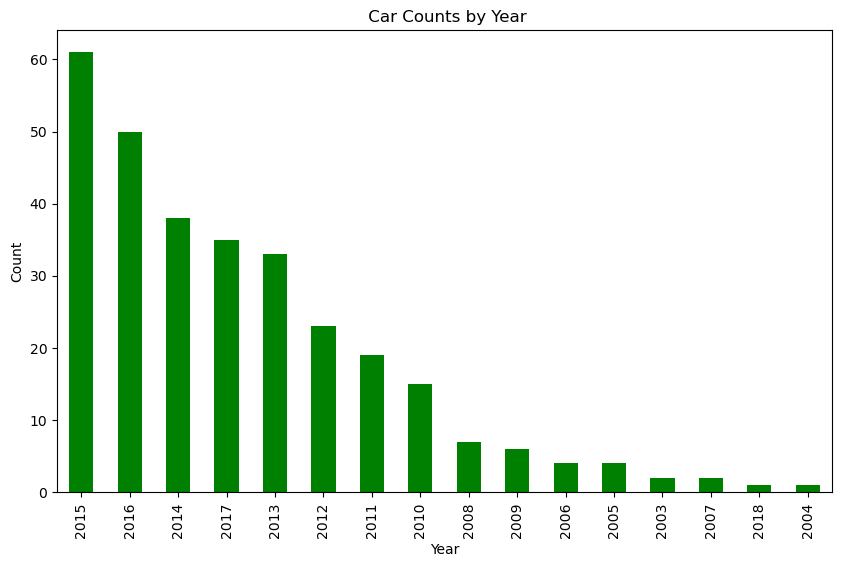

In [13]:
Year_counts = car['Year'].value_counts()
plt.figure(figsize=(10, 6))
Year_counts.plot(kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title(' Car Counts by Year')
plt.show()


<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

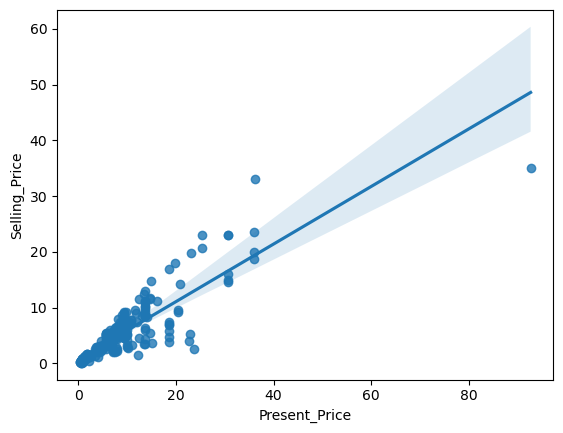

In [14]:
# regression plot
sns.regplot(x='Present_Price', y='Selling_Price', data=car)


Text(0.5, 1.0, 'Car Driven_kms')

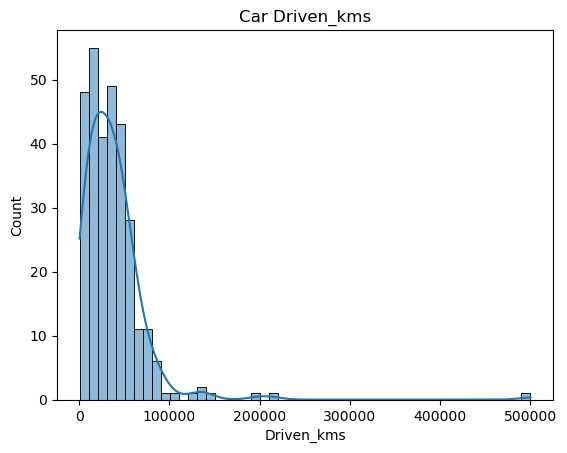

In [15]:
sns.histplot(car['Driven_kms'], kde = True)
plt.title('Car Driven_kms')

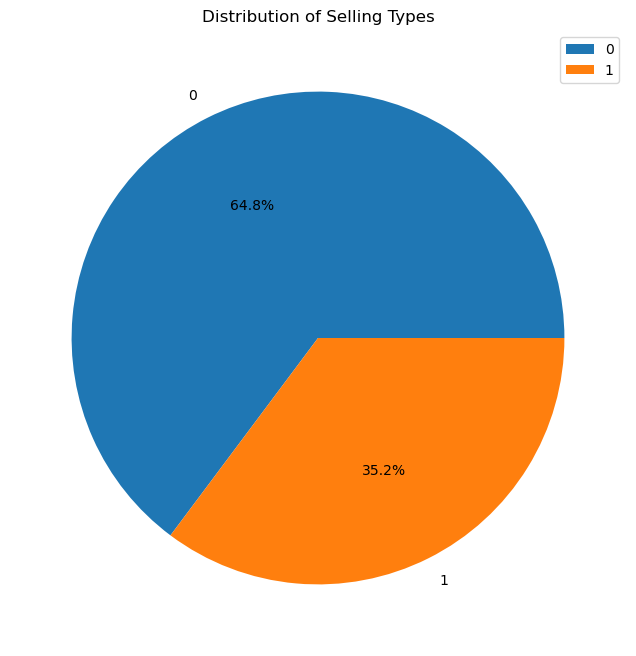

In [16]:
plt.figure(figsize=(8, 8))
selling_type_counts = car['Selling_type'].value_counts()
plt.pie(selling_type_counts, labels=selling_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Selling Types')
plt.legend()
plt.show()



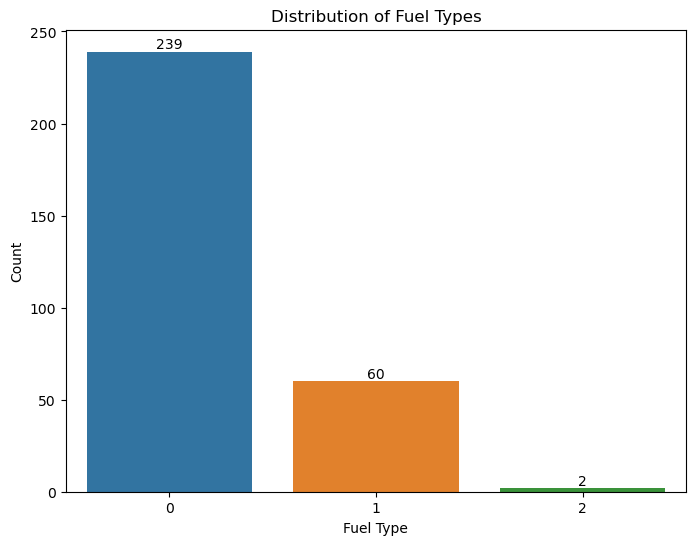

In [17]:
#  Petrol:0,'Diesel':1,'CNG':2

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Fuel_Type', data=car)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

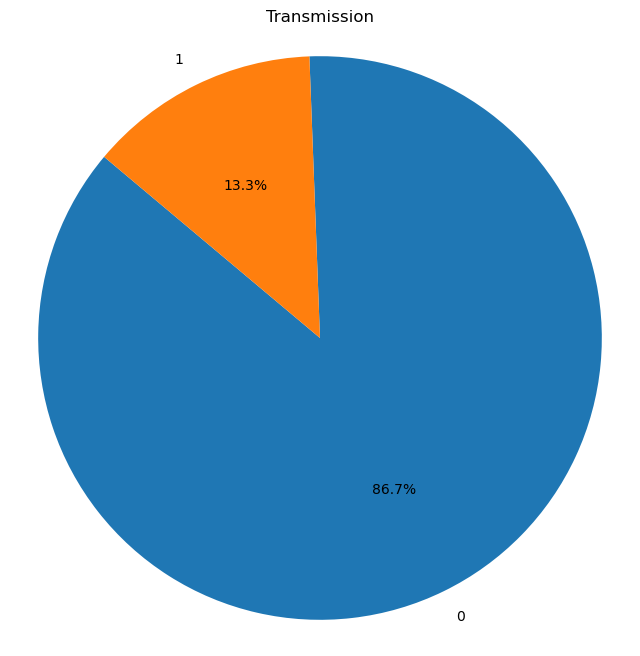

In [18]:
# Manual :0  and Automatic :1

plt.figure(figsize=(8, 8))
symbol_counts = car['Transmission'].value_counts()
plt.pie(symbol_counts, labels=symbol_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transmission')
plt.axis('equal')
plt.show()

In [19]:
# choosing the most appropriate columns

cars = car[['Year', 'Selling_Price', 'Present_Price','Driven_kms',
            'Fuel_Type','Selling_type','Transmission', 'Owner']]
 
cars.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


<Figure size 5000x3800 with 0 Axes>

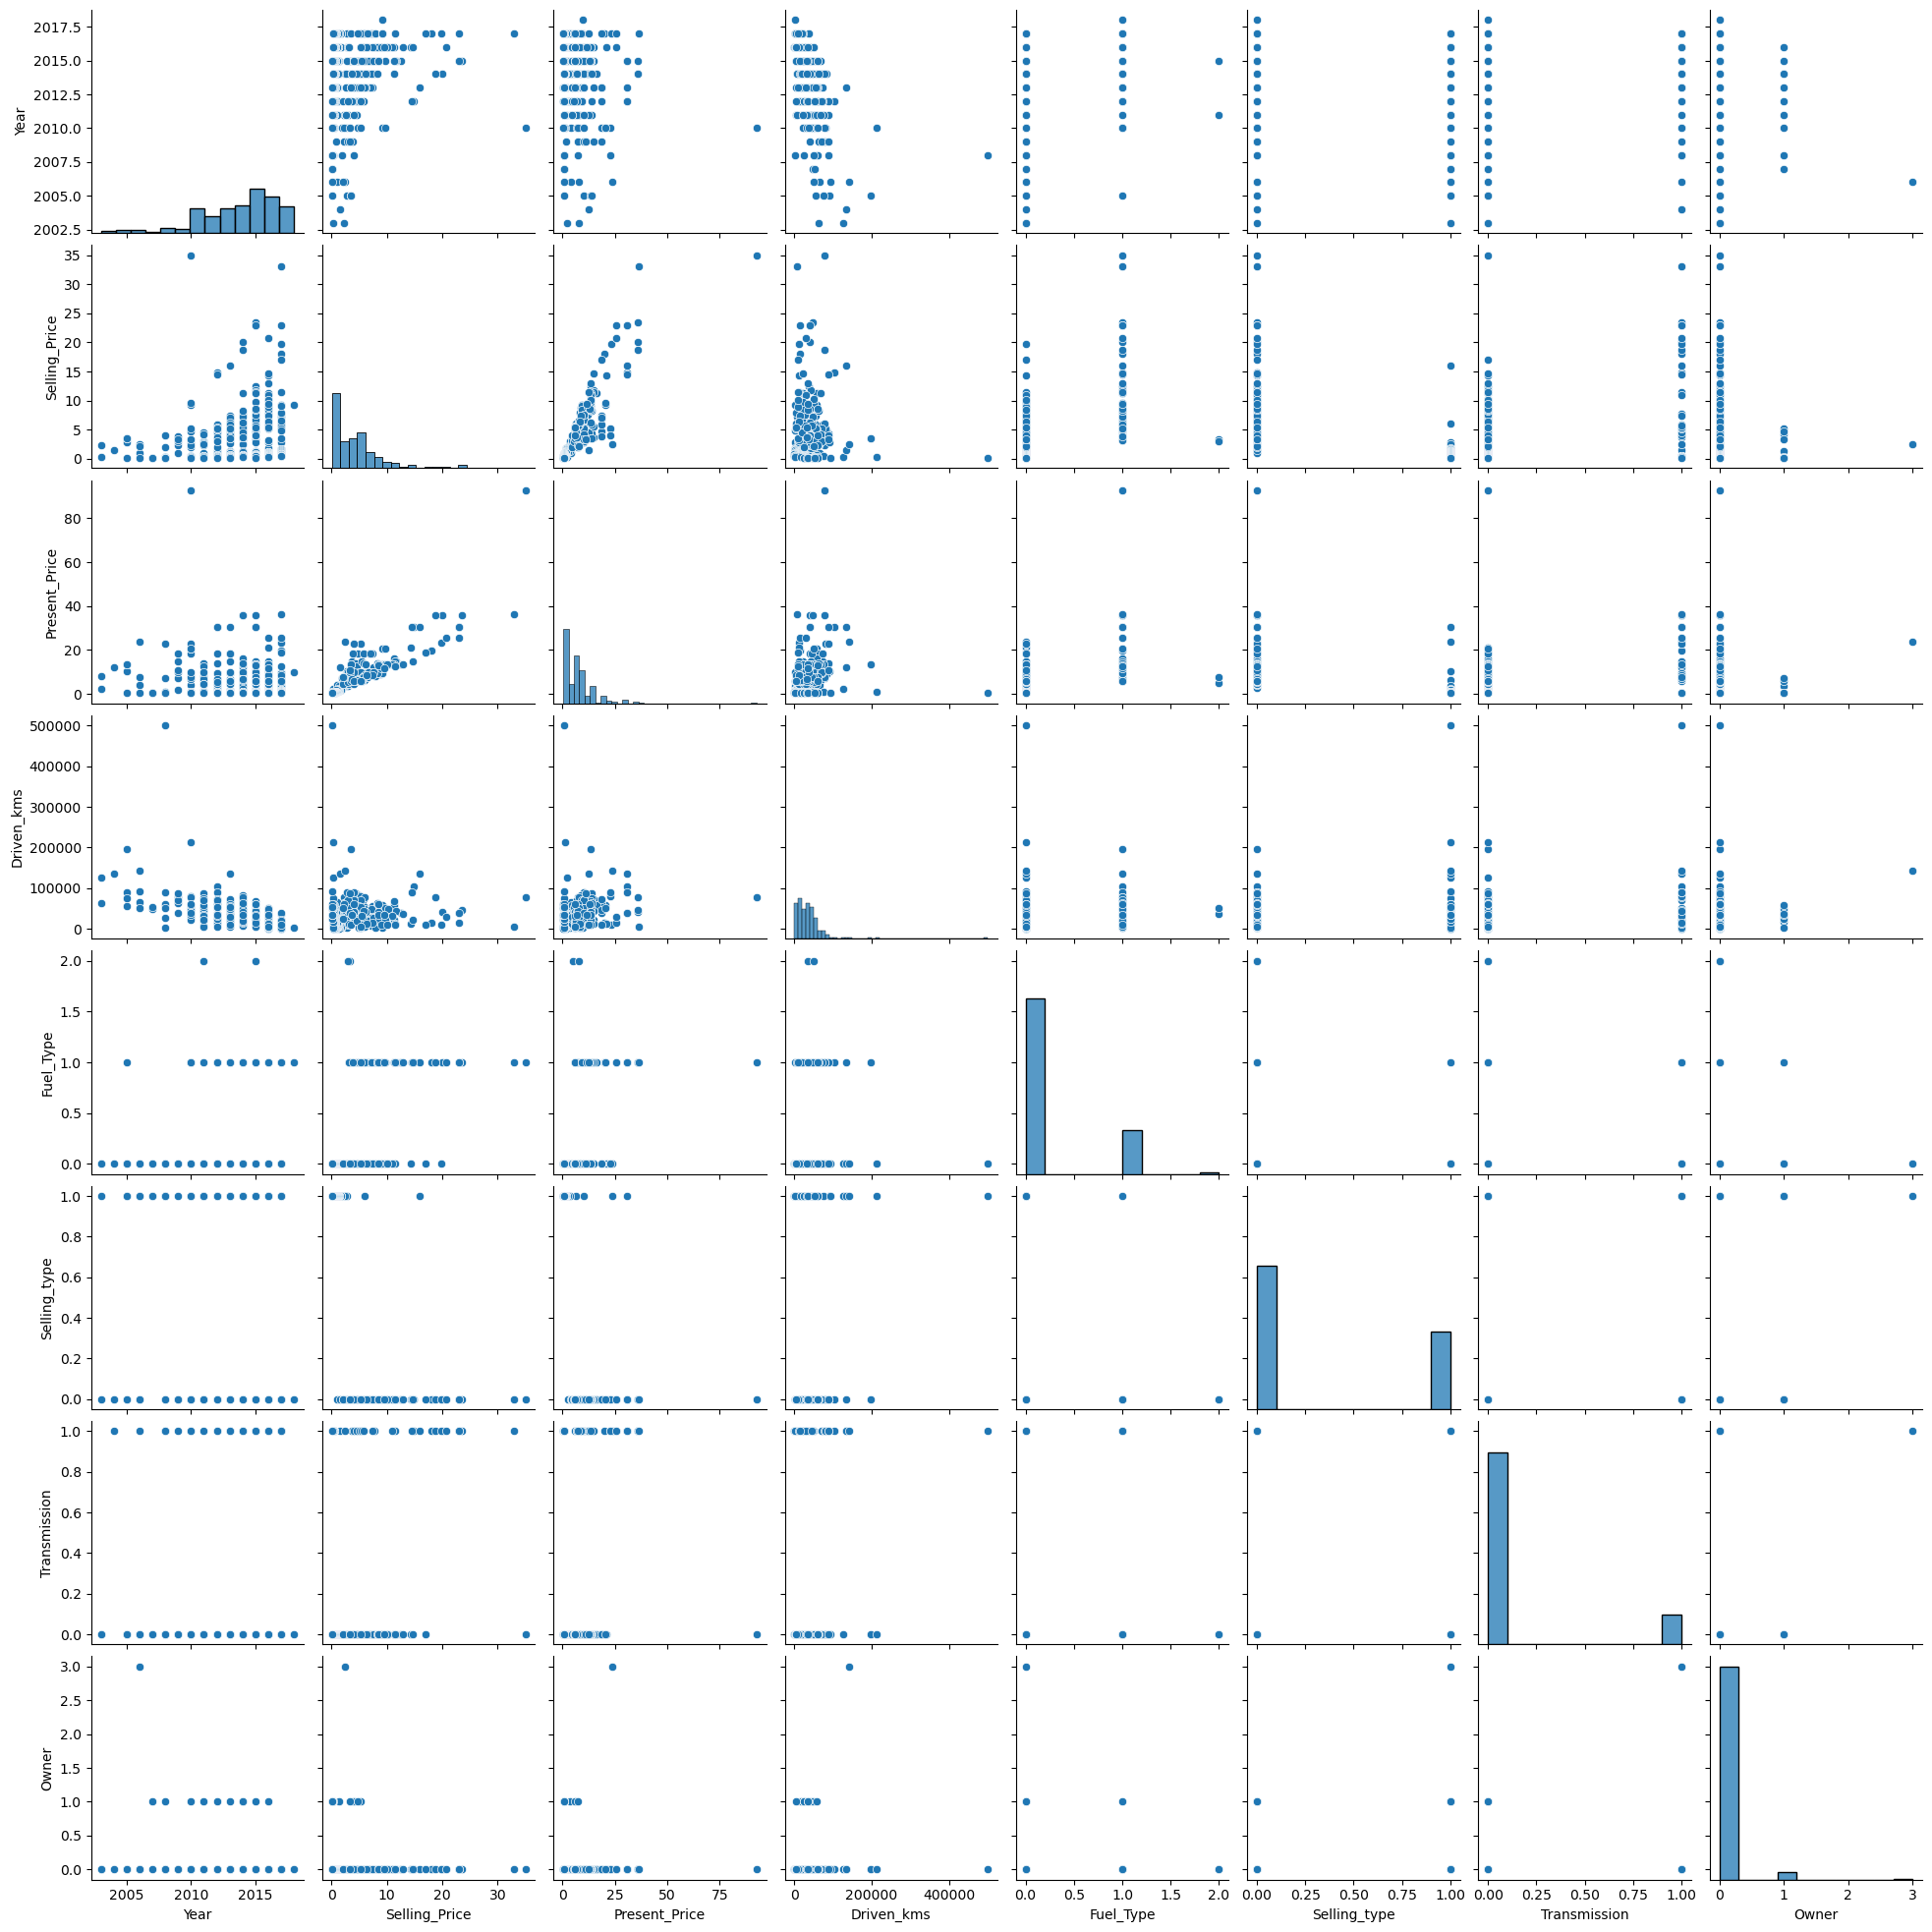

In [20]:
# to know the behaviour(relation) of the data with each other 
plt.figure(figsize=(50, 38))
sns.pairplot(cars, palette='cubehelix')
plt.show()

## Handeling the outliers

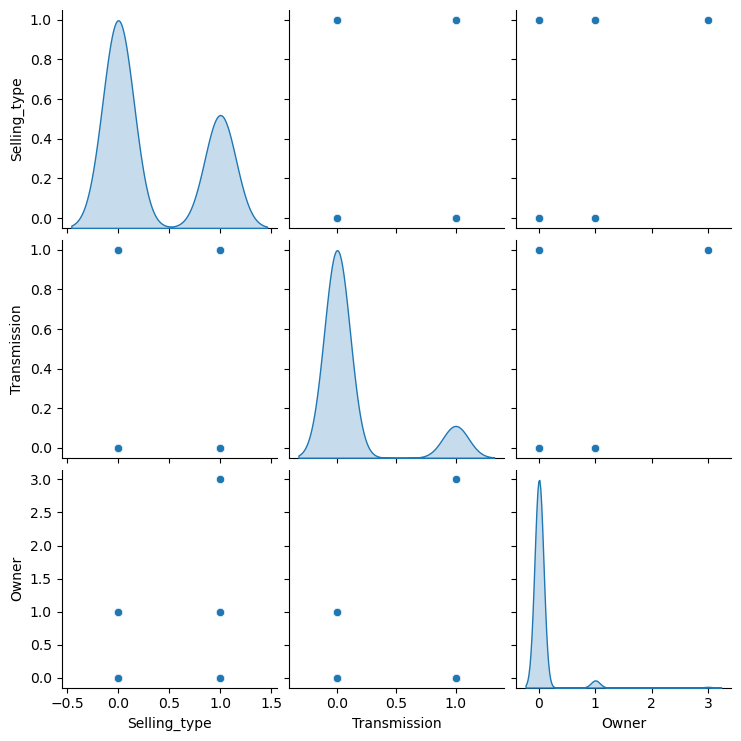

In [21]:
sns.pairplot(car.iloc[:, 6:], diag_kind='kde', palette='purple')
plt.show()


## Capping

In [22]:
def Outlier(var):
    for x in var.iloc[:, 6:].columns:
        Q1 = var[x].quantile(0.2)
        Q3 = var[x].quantile(0.8)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df1 = Outlier(car)

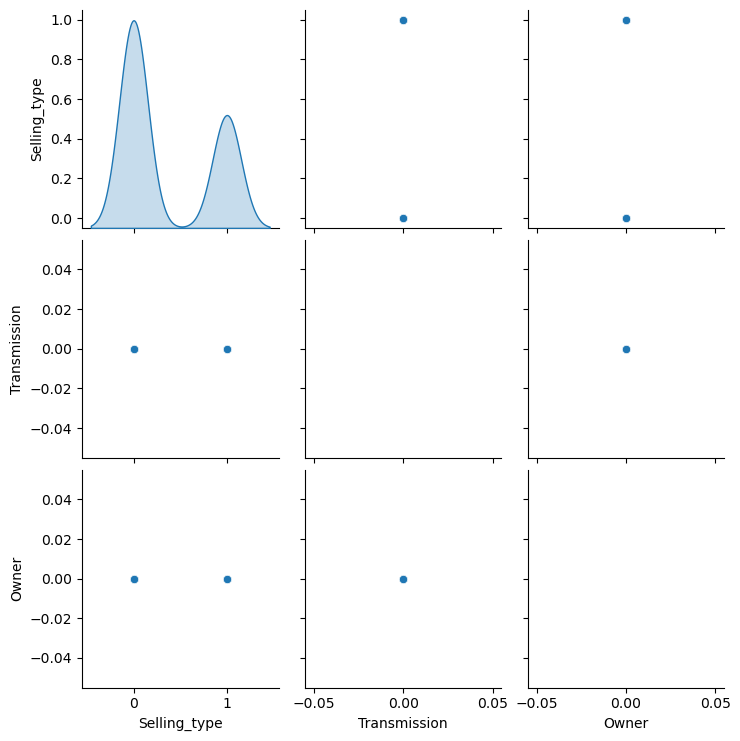

In [23]:
sns.pairplot(df1.iloc[:, 6:], diag_kind='kde', palette='pink')
plt.show()

## Splitting the data and Target

In [24]:
X = car.drop(['Car_Name','Selling_Price'],axis=1)
y = car['Selling_Price']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
X_train

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
74,2014,8.93,83000,1,0,0,0
239,2012,4.43,23709,0,0,0,0
64,2017,36.23,6000,1,0,0,0
294,2014,6.80,33019,0,0,0,0
286,2016,7.90,28569,0,0,0,0
...,...,...,...,...,...,...,...
251,2013,9.90,56701,0,0,0,0
192,2007,0.75,49000,0,1,0,0
117,2015,1.90,14000,0,1,0,0
47,2006,4.15,65000,0,0,0,0


In [27]:
X_test

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
223,2015,9.400,61381,1,0,0,0
150,2011,0.826,6000,0,1,0,0
226,2015,5.700,24678,0,0,0,0
296,2016,11.600,33988,1,0,0,0
52,2017,19.770,15000,1,0,0,0
...,...,...,...,...,...,...,...
137,2013,0.787,16000,0,1,0,0
227,2011,4.430,57000,0,0,0,0
26,2013,5.870,55138,0,0,0,0
106,2014,3.450,16500,0,1,0,0


In [28]:
#checking the shape of the data after train-test split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 7)
(61, 7)
(240,)
(61,)


# Data Standerisation

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

## 1. Linear Regression

In [30]:
from sklearn import metrics

In [31]:
# loading the linear regression model
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()

In [32]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [33]:
# model evaluation: Linear regression

#Predicting on train data
y_pred_train = lr_model.predict(X_train)

#Predicting on test data
y_pred_test = lr_model.predict(X_test)


In [34]:
# Checking R2 score on train dataset
R2_score_Lr_train = metrics.r2_score(y_train, y_pred_train)
R2_score_Lr_train

0.8593774027589626

In [35]:
# Checking R2 score on test dataset
R2_score_Lr_test = metrics.r2_score(y_test, y_pred_test)
R2_score_Lr_test

0.9044523941042275

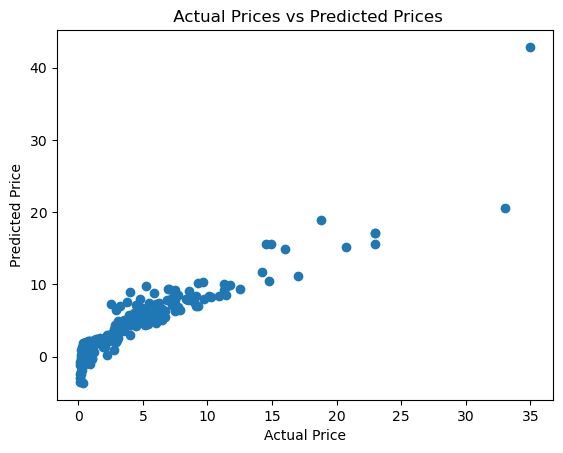

In [36]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##  2.Random Forest Regressor


In [37]:
from sklearn.ensemble import RandomForestRegressor

cf_random = RandomForestRegressor()
cf_random.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
# Model Evaluation

# Prediction on train data
y_pred_rf_train = cf_random.predict(X_train)

# Prediction on test data
y_pred_rf_test = cf_random.predict(X_test)

In [39]:
# Checking R2 score on train dataset
R2_score_rf_train = metrics.r2_score(y_train, y_pred_rf_train)
R2_score_rf_train

0.9898581677036684

In [40]:
# for the R2 score on test dataset
R2_score_rf_test = metrics.r2_score(y_test, y_pred_rf_test)
R2_score_rf_test

0.9630606799636642

# 3.KNeighbours

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 2)


In [42]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [43]:
#Predicting on train data
y_pred_knn_train = knn.predict(X_train)

#Predicting on test data
y_pred_knn_test = knn.predict(X_test)

In [44]:
# Calculating the R2 score on train dataset
R2_score_Knn_train = metrics.r2_score(y_train, y_pred_knn_train)
R2_score_Knn_train

0.9733672636579289

In [45]:
# Calculating the R2 score on test dataset
R2_score_Knn_test = metrics.r2_score(y_test, y_pred_knn_test)
R2_score_Knn_test

0.9541129639093877

In [46]:
models = pd.DataFrame({ 'Model': ['Linear Regressor' ,'Random Forest Regressor', 'KNeighbors'],
                       
                       'Training R2_Score': [R2_score_Lr_train, R2_score_rf_train,R2_score_Knn_train],
                       
                       
                       'Testing R2_Score': [R2_score_Lr_test, R2_score_rf_test, R2_score_Knn_test]})

models.sort_values(by = ['Training R2_Score', 'Testing R2_Score'], ascending = False, ignore_index = True)

,Model,Training R2_Score,Testing R2_Score
0,Random Forest Regressor,0.989858,0.963061
1,KNeighbors,0.973367,0.954113
2,Linear Regressor,0.859377,0.904452


## Kfold Cross Validation

In [47]:
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

In [48]:
Regressors = []

Regressors.append(LinearRegression())

Regressors.append(RandomForestRegressor())

Regressors.append(KNeighborsRegressor(n_neighbors= 2))


In [49]:
cross_value_results = []

for Regressor in Regressors:
  cross_value_results.append(cross_val_score(Regressor, X_train, y_train, scoring = 'r2', cv = 5))

In [50]:
cross_value_results

[array([0.75715728, 0.86888236, 0.81814355, 0.74600126, 0.88593121]),
 array([0.88202622, 0.97126811, 0.88072189, 0.9014752 , 0.97611094]),
 array([0.85905407, 0.958557  , 0.92724469, 0.93656906, 0.93191652])]

In [51]:
cross_value_mean =[]
cross_value_std = []

for cross_value_result in cross_value_results:
    cross_value_mean.append(cross_value_result.mean())
    cross_value_std.append(cross_value_result.std())

In [52]:
cv_res = pd.DataFrame({'Cross Validation Mean': cross_value_mean,
                        'Cross Validation Std': cross_value_std,
                        'Algorithm':['Linear Regressor','Random Forest Regressor', 'KNeighbors']})
                        
                        
cv_res.sort_values(by = 'Cross Validation Mean', ascending  = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.922668,0.033569,KNeighbors
1,0.922320,0.042610,Random Forest Regressor
2,0.815223,0.056658,Linear Regressor


## Tunnning on the Random Forest 

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [55]:
rf = RandomForestRegressor()

In [56]:
X_train.shape

(240, 7)

In [57]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [58]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]})

In [59]:
print("TOP  Parameters: ", grid_search.best_params_)

TOP  Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [60]:
rf = RandomForestRegressor(max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt')

In [62]:
#Prediction on the train data

y_pred_rfg_train = rf.predict(X_train)


#Prediction on the test data

y_pred_rfg_test = rf.predict(X_test)

In [63]:
# Calculating the R2 score on train dataset

R2_score_rfg_train = metrics.r2_score(y_train, y_pred_rfg_train)
R2_score_rfg_train

0.9755452209845825

In [64]:
# Calculating the R2 score on test dataset

R2_score_rfg_test = metrics.r2_score(y_test, y_pred_rfg_test)

R2_score_rfg_test

0.930287127755868

### After tuning the Random Forest model using GridSearchCV, the R2 score for the test dataset stands at 0.93.